<a href="https://colab.research.google.com/github/antonsysoev/comp_tech2025/blob/main/Lecture_11_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Установка и загрузка пакетов
install.packages(c("cluster", "factoextra", "dbscan", "ggplot2", "dplyr", "ggrepel"))
library(cluster)
library(factoextra)
library(dbscan)
library(ggplot2)
library(dplyr)
library(ggrepel)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘mvtnorm’, ‘numDeriv’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: ‘dbscan’


The following object is masked from ‘package:stats’:

    as.dendrogram



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

=== ОСНОВНАЯ СТАТИСТИКА ДАННЫХ ===


 total_episodes  budget_per_episode  imdb_rating    years_running   
 Min.   :  5.0   Min.   : 1.000     Min.   :8.000   Min.   : 1.000  
 1st Qu.: 24.0   1st Qu.: 3.000     1st Qu.:8.575   1st Qu.: 4.000  
 Median : 40.5   Median : 4.500     Median :8.700   Median : 5.000  
 Mean   :103.0   Mean   : 5.938     Mean   :8.713   Mean   : 7.625  
 3rd Qu.: 73.0   3rd Qu.: 9.250     3rd Qu.:8.900   3rd Qu.: 9.000  
 Max.   :750.0   Max.   :15.000     Max.   :9.500   Max.   :34.000  


=== КОРРЕЛЯЦИОННАЯ МАТРИЦА ===
                   total_episodes budget_per_episode imdb_rating years_running
total_episodes          1.0000000        -0.17532159 -0.24676087     0.9233534
budget_per_episode     -0.1753216         1.00000000  0.01354097    -0.2360690
imdb_rating            -0.2467609         0.01354097  1.00000000    -0.1884278
years_running           0.9233534        -0.23606898 -0.18842779     1.0000000


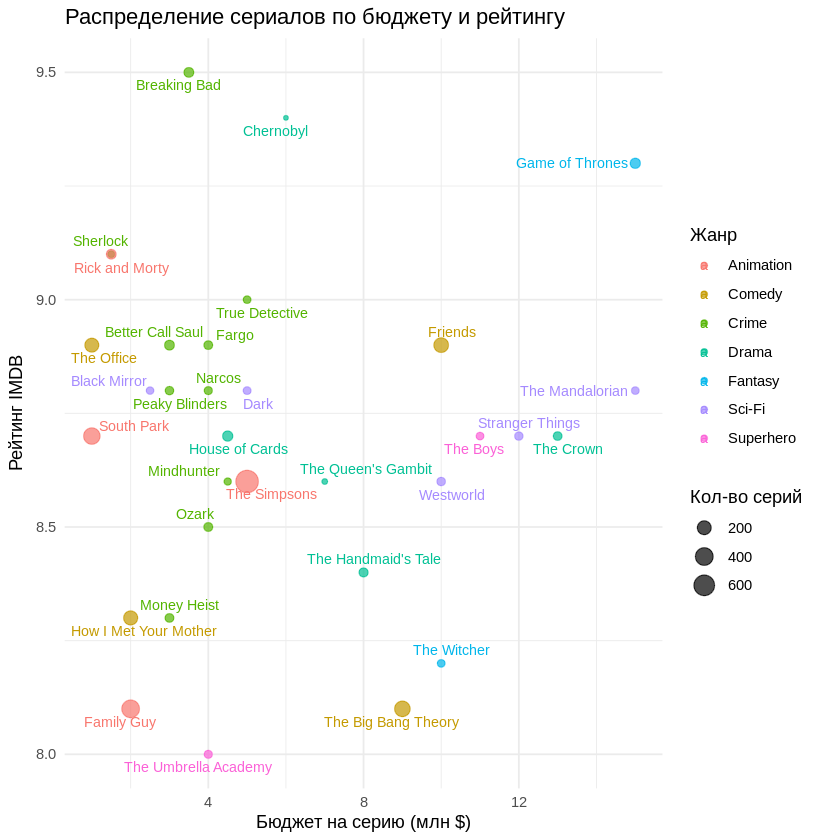

In [ ]:
# СОЗДАНИЕ РЕАЛЬНОГО ДАТАСЕТА О СЕРИАЛАХ
series_data <- data.frame(
  series_name = c("Game of Thrones", "Stranger Things", "The Crown", "Breaking Bad",
                  "The Mandalorian", "The Witcher", "House of Cards", "The Boys",
                  "Ozark", "Money Heist", "The Queen's Gambit", "Chernobyl",
                  "The Office", "Friends", "The Big Bang Theory", "How I Met Your Mother",
                  "Sherlock", "Black Mirror", "Westworld", "The Handmaid's Tale",
                  "Narcos", "Peaky Blinders", "The Umbrella Academy", "Dark",
                  "The Simpsons", "South Park", "Family Guy", "Rick and Morty",
                  "Better Call Saul", "Fargo", "True Detective", "Mindhunter"),

  total_episodes = c(73, 34, 40, 62, 24, 24, 73, 24, 44, 41, 7, 5,
                     201, 236, 279, 208, 13, 22, 36, 46, 30, 36, 30, 26,
                     750, 325, 400, 61, 63, 41, 24, 19),

  budget_per_episode = c(15, 12, 13, 3.5, 15, 10, 4.5, 11, 4, 3, 7, 6,
                         1, 10, 9, 2, 1.5, 2.5, 10, 8, 4, 3, 4, 5,
                         5, 1, 2, 1.5, 3, 4, 5, 4.5),

  imdb_rating = c(9.3, 8.7, 8.7, 9.5, 8.8, 8.2, 8.7, 8.7, 8.5, 8.3, 8.6, 9.4,
                  8.9, 8.9, 8.1, 8.3, 9.1, 8.8, 8.6, 8.4, 8.8, 8.8, 8.0, 8.8,
                  8.6, 8.7, 8.1, 9.1, 8.9, 8.9, 9.0, 8.6),

  years_running = c(8, 6, 6, 5, 4, 3, 6, 4, 4, 5, 1, 1,
                    9, 10, 12, 9, 4, 12, 4, 5, 3, 8, 3, 3,
                    34, 26, 24, 9, 6, 4, 4, 2),

  genre = c("Fantasy", "Sci-Fi", "Drama", "Crime", "Sci-Fi", "Fantasy", "Drama", "Superhero",
            "Crime", "Crime", "Drama", "Drama", "Comedy", "Comedy", "Comedy", "Comedy",
            "Crime", "Sci-Fi", "Sci-Fi", "Drama", "Crime", "Crime", "Superhero", "Sci-Fi",
            "Animation", "Animation", "Animation", "Animation", "Crime", "Crime", "Crime", "Crime")
)

# ПРЕДВАРИТЕЛЬНЫЙ АНАЛИЗ ДАННЫХ
cat("=== ОСНОВНАЯ СТАТИСТИКА ДАННЫХ ===\n")
summary(series_data[,2:5])

cat("\n=== КОРРЕЛЯЦИОННАЯ МАТРИЦА ===\n")
cor_matrix <- cor(series_data[,2:5])
print(cor_matrix)

# ВИЗУАЛИЗАЦИЯ ИСХОДНЫХ ДАННЫХ
ggplot(series_data, aes(x = budget_per_episode, y = imdb_rating, size = total_episodes, color = genre)) +
  geom_point(alpha = 0.7) +
  geom_text_repel(aes(label = series_name), size = 3, max.overlaps = 10) +
  labs(title = "Распределение сериалов по бюджету и рейтингу",
       x = "Бюджет на серию (млн $)", y = "Рейтинг IMDB",
       size = "Кол-во серий", color = "Жанр") +
  theme_minimal()

# ПОДГОТОВКА ДАННЫХ ДЛЯ КЛАСТЕРИЗАЦИИ
# Масштабирование числовых признаков
scaled_data <- scale(series_data[, c("total_episodes", "budget_per_episode", "imdb_rating", "years_running")])
rownames(scaled_data) <- series_data$series_name



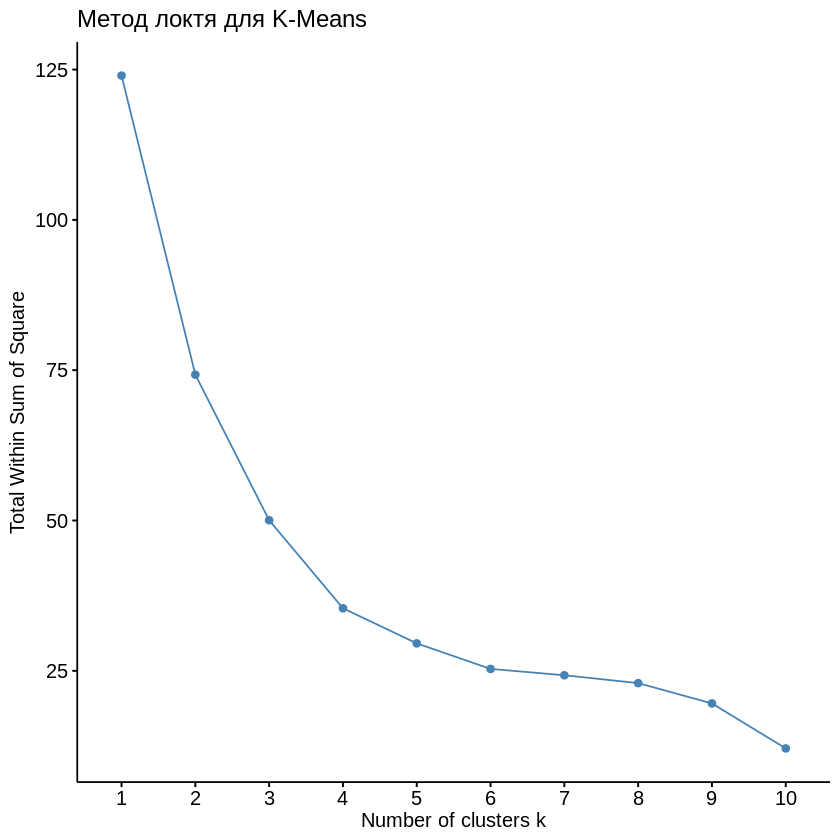

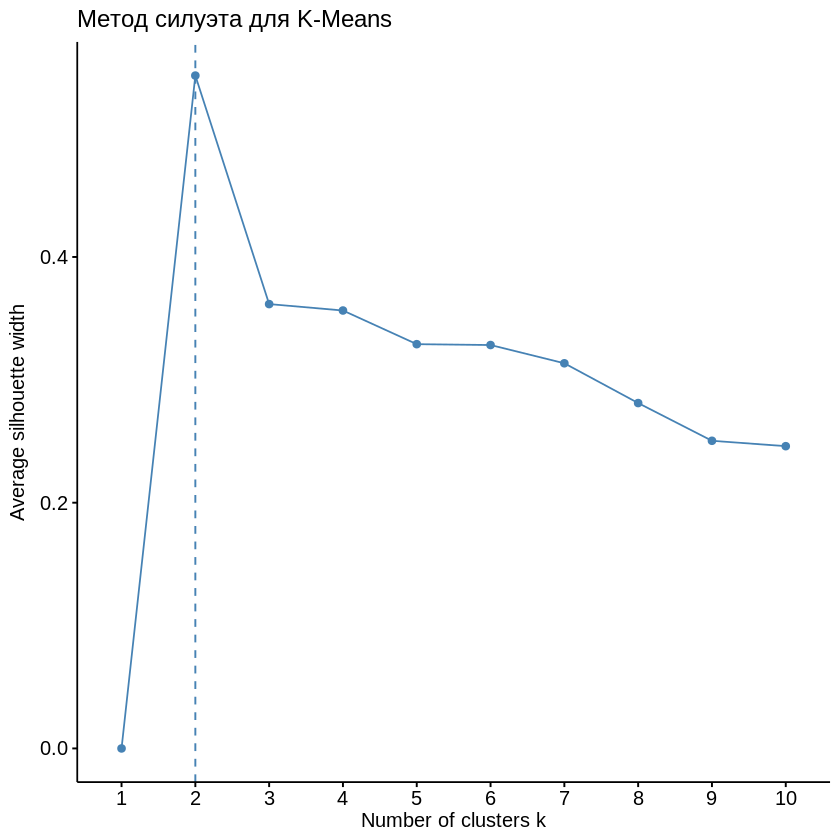

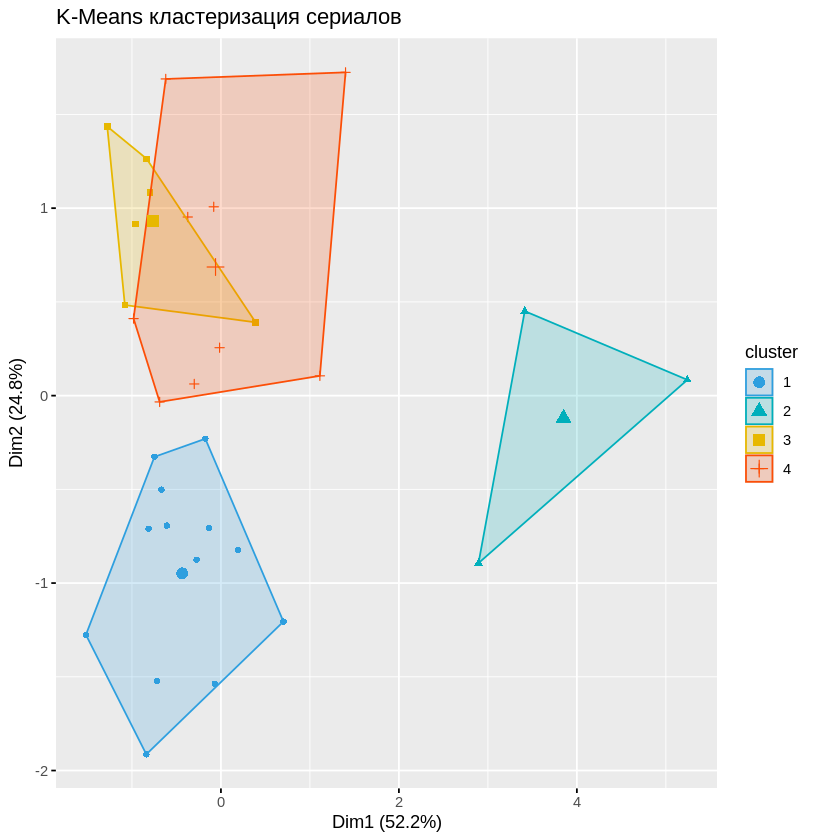

In [ ]:
# 1. K-MEANS КЛАСТЕРИЗАЦИЯ

# Определение оптимального числа кластеров
fviz_nbclust(scaled_data, kmeans, method = "wss") +
  labs(title = "Метод локтя для K-Means")

fviz_nbclust(scaled_data, kmeans, method = "silhouette") +
  labs(title = "Метод силуэта для K-Means")

# Выполнение K-Means с 4 кластерами
set.seed(123)
kmeans_result <- kmeans(scaled_data, centers = 4, nstart = 25)

# Визуализация K-Means
fviz_cluster(kmeans_result, data = scaled_data,
             palette = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07"),
             geom = "point", ellipse.type = "convex",
             main = "K-Means кластеризация сериалов")



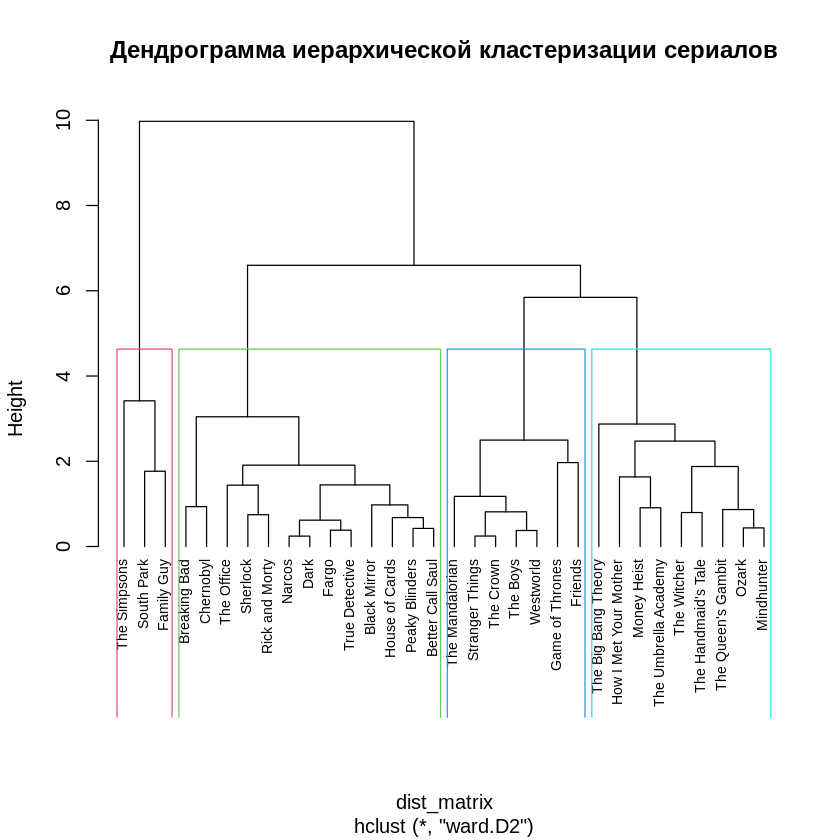

In [ ]:
# 2. ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ

# Матрица расстояний и дендрограмма
dist_matrix <- dist(scaled_data, method = "euclidean")
hc_result <- hclust(dist_matrix, method = "ward.D2")

# Визуализация дендрограммы
plot(hc_result, cex = 0.7, hang = -1,
     main = "Дендрограмма иерархической кластеризации сериалов")
rect.hclust(hc_result, k = 4, border = 2:5)

# Получение кластеров
hc_clusters <- cutree(hc_result, k = 4)



Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>.”


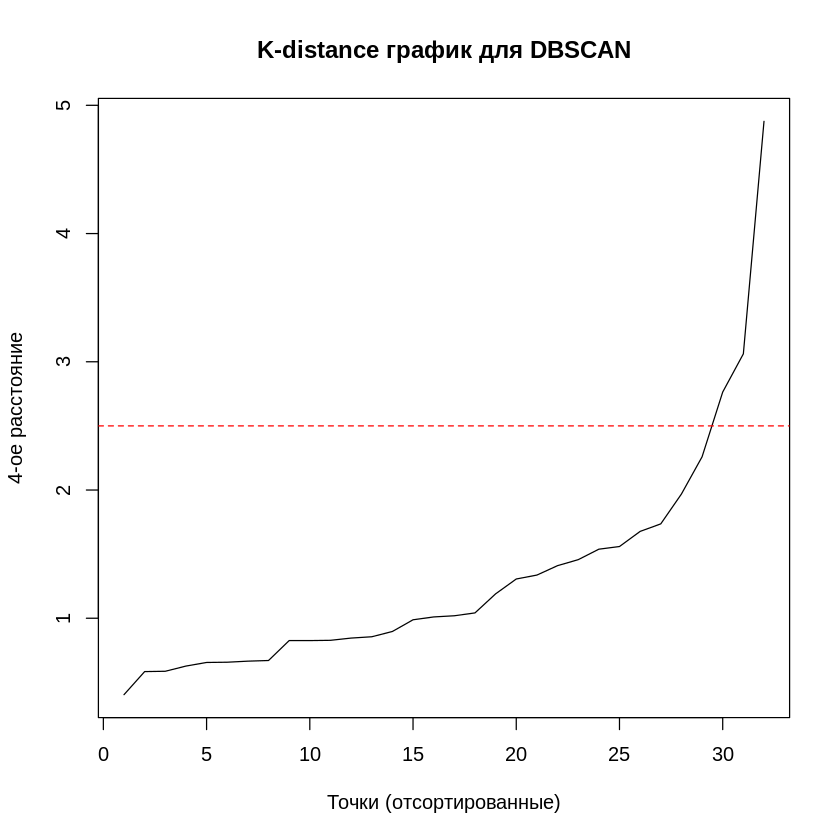

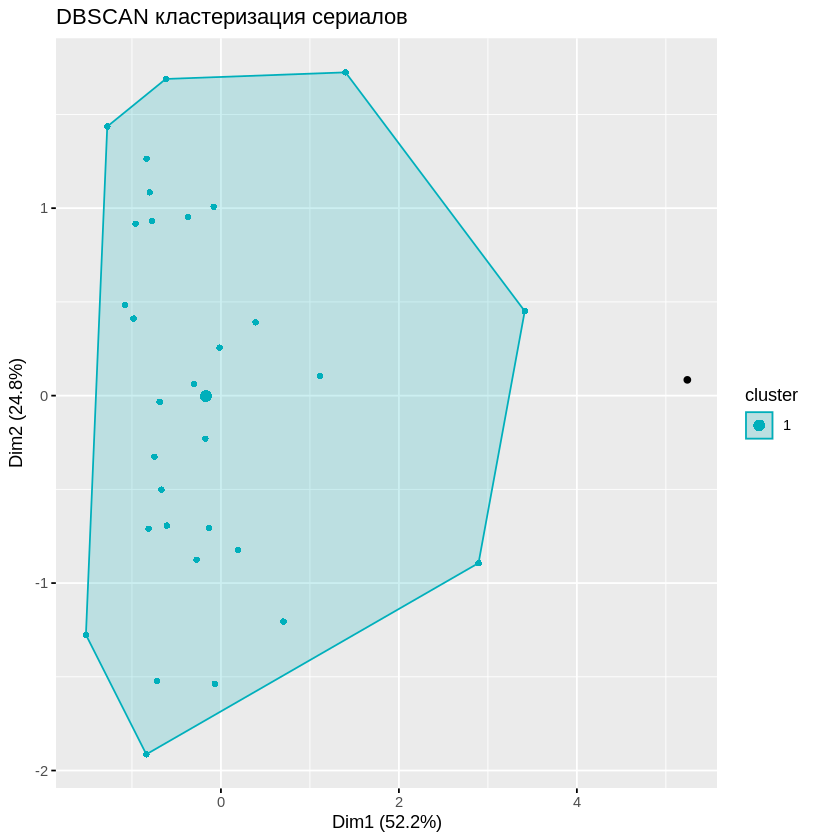

In [ ]:
# 3. DBSCAN КЛАСТЕРИЗАЦИЯ

# Подбор параметра eps
knn_dist <- kNNdist(scaled_data, k = 4)
plot(sort(knn_dist), type = "l", main = "K-distance график для DBSCAN",
     xlab = "Точки (отсортированные)", ylab = "4-ое расстояние")
abline(h = 2.5, col = "red", lty = 2)

# Выполнение DBSCAN
dbscan_result <- dbscan(scaled_data, eps = 2.5, minPts = 4)

# Визуализация DBSCAN
fviz_cluster(dbscan_result, data = scaled_data,
             palette = c("#00AFBB", "#E7B800", "#FC4E07", "#2E9FDF"),
             geom = "point", main = "DBSCAN кластеризация сериалов")

# 4. ДОБАВЛЕНИЕ РЕЗУЛЬТАТОВ К ИСХОДНЫМ ДАННЫМ
series_data$kmeans_cluster <- as.factor(kmeans_result$cluster)
series_data$hc_cluster <- as.factor(hc_clusters)
series_data$dbscan_cluster <- as.factor(dbscan_result$cluster)



In [ ]:
# 5. СРАВНИТЕЛЬНЫЙ АНАЛИЗ КЛАСТЕРОВ

# Функция для анализа характеристик кластеров
analyze_clusters <- function(cluster_column, algorithm_name) {
  cluster_summary <- series_data %>%
    group_by(!!sym(cluster_column)) %>%
    summarise(
      n_series = n(),
      avg_episodes = mean(total_episodes),
      avg_budget = mean(budget_per_episode),
      avg_rating = mean(imdb_rating),
      avg_years = mean(years_running),
      .groups = 'drop'
    )

  cat(paste0("\n=== ", algorithm_name, " - ХАРАКТЕРИСТИКИ КЛАСТЕРОВ ===\n"))
  print(cluster_summary)

  return(cluster_summary)
}

# Анализ для каждого алгоритма
kmeans_summary <- analyze_clusters("kmeans_cluster", "K-MEANS")
hc_summary <- analyze_clusters("hc_cluster", "ИЕРАРХИЧЕСКАЯ")
dbscan_summary <- analyze_clusters("dbscan_cluster", "DBSCAN")




=== K-MEANS - ХАРАКТЕРИСТИКИ КЛАСТЕРОВ ===
# A tibble: 4 × 6
  kmeans_cluster n_series avg_episodes avg_budget avg_rating avg_years
  <fct>             <int>        <dbl>      <dbl>      <dbl>     <dbl>
1 1                    13         50.5       3.42       8.98      5.69
2 2                     3        492.        2.67       8.47     28   
3 3                     7         66.7      12.3        8.81      6   
4 4                     9         77.6       5.72       8.33      4.89

=== ИЕРАРХИЧЕСКАЯ - ХАРАКТЕРИСТИКИ КЛАСТЕРОВ ===
# A tibble: 4 × 6
  hc_cluster n_series avg_episodes avg_budget avg_rating avg_years
  <fct>         <int>        <dbl>      <dbl>      <dbl>     <dbl>
1 1                 7         66.7      12.3        8.81      6   
2 2                13         50.5       3.42       8.98      5.69
3 3                 9         77.6       5.72       8.33      4.89
4 4                 3        492.        2.67       8.47     28   

=== DBSCAN - ХАРАКТЕРИСТИКИ КЛАСТЕРОВ ===

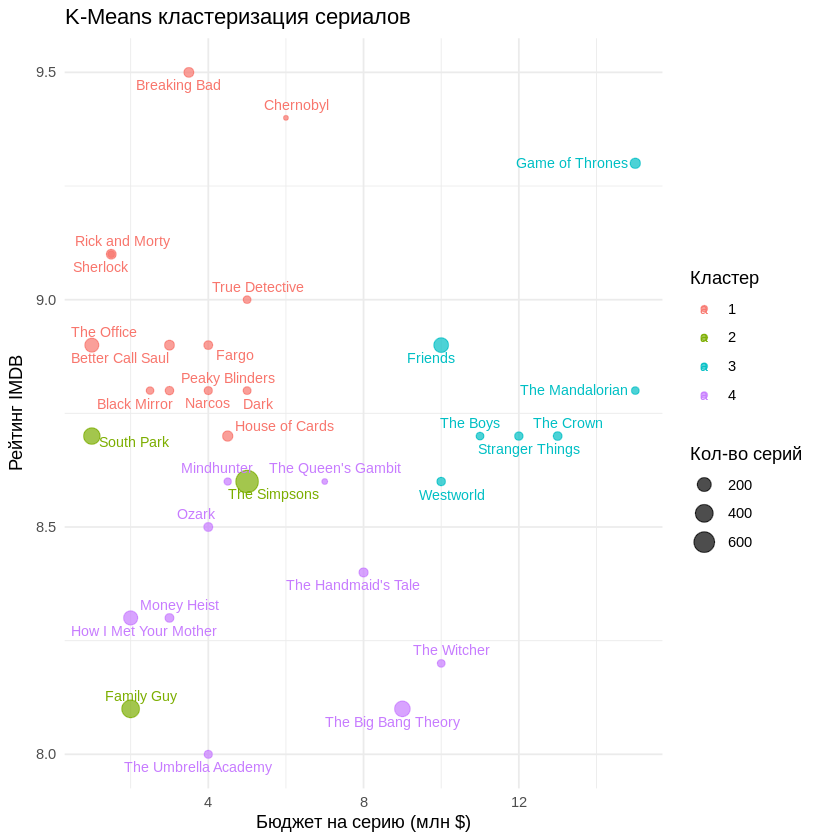

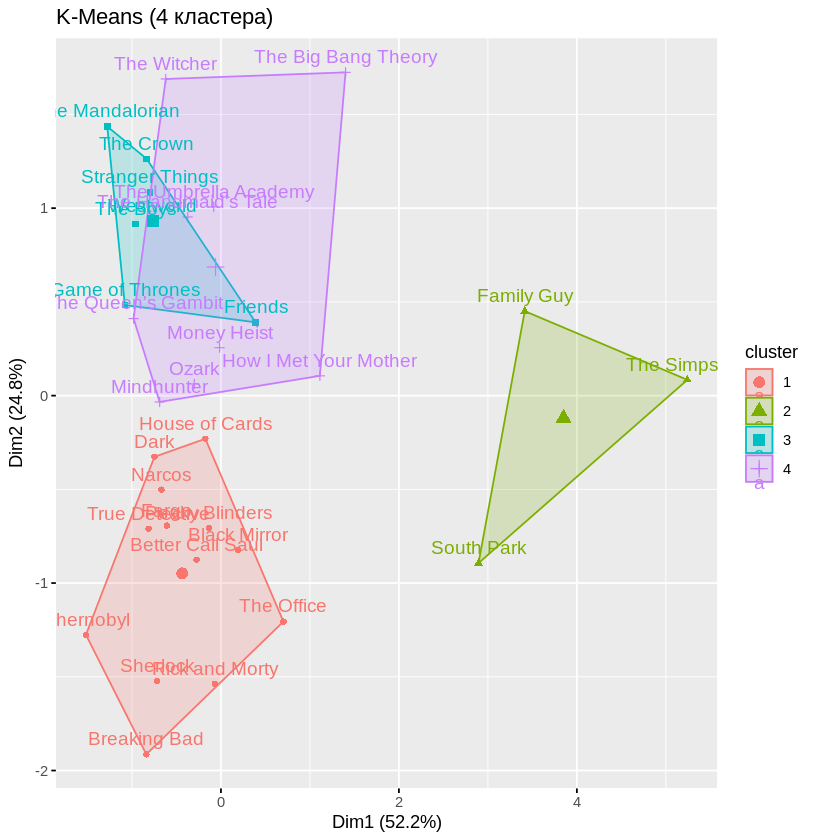

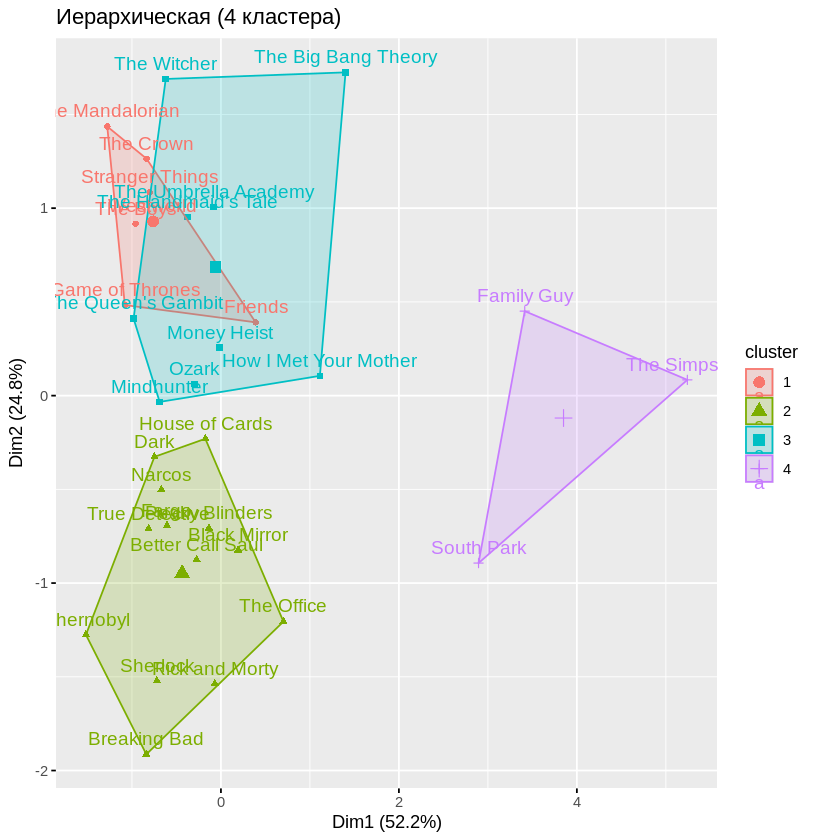

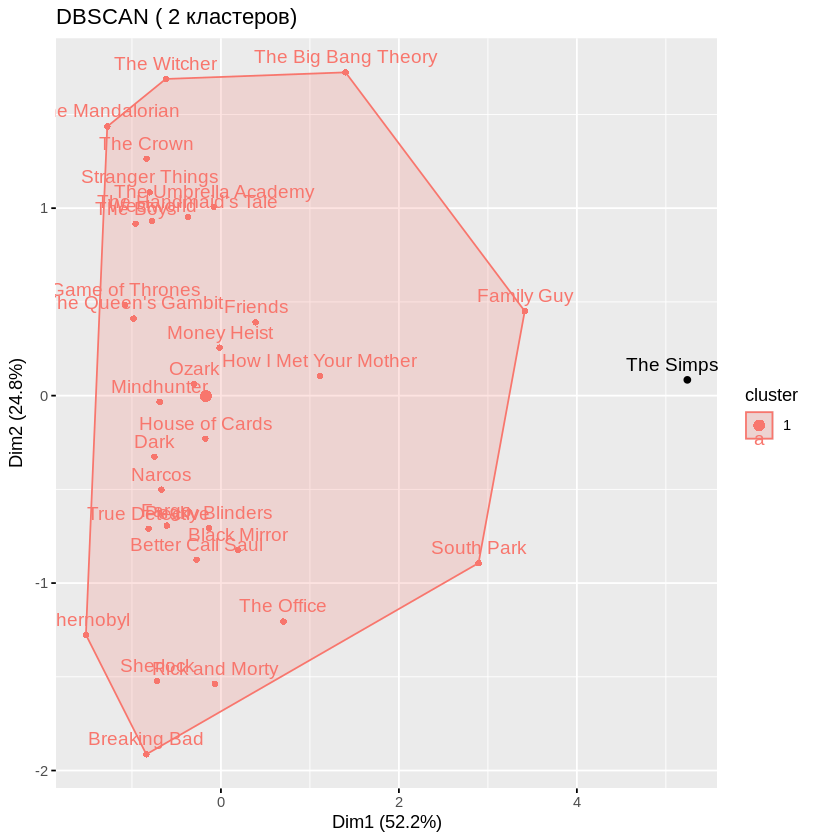

In [ ]:
# 6. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ КЛАСТЕРИЗАЦИИ

# K-Means результаты с подписями
ggplot(series_data, aes(x = budget_per_episode, y = imdb_rating,
                       color = kmeans_cluster, size = total_episodes)) +
  geom_point(alpha = 0.7) +
  geom_text_repel(aes(label = series_name), size = 3, max.overlaps = 15) +
  labs(title = "K-Means кластеризация сериалов",
       x = "Бюджет на серию (млн $)", y = "Рейтинг IMDB",
       color = "Кластер", size = "Кол-во серий") +
  theme_minimal()

# Сравнительная визуализация всех алгоритмов
par(mfrow = c(2, 2))

# K-Means
fviz_cluster(list(data = scaled_data, cluster = kmeans_result$cluster),
             main = "K-Means (4 кластера)")

# Иерархическая
fviz_cluster(list(data = scaled_data, cluster = hc_clusters),
             main = "Иерархическая (4 кластера)")

# DBSCAN
fviz_cluster(dbscan_result, data = scaled_data,
             main = paste("DBSCAN (", length(unique(dbscan_result$cluster)), "кластеров)"))




=== СРАВНЕНИЕ КАЧЕСТВА КЛАСТЕРИЗАЦИИ ===
     Algorithm Silhouette_Score Number_of_Clusters
1      K-Means        0.3564410                  4
2 Hierarchical        0.3564410                  4
3       DBSCAN        0.5712596                  2
  cluster size ave.sil.width
1       1   13          0.43
2       2    3          0.37
3       3    7          0.43
4       4    9          0.19


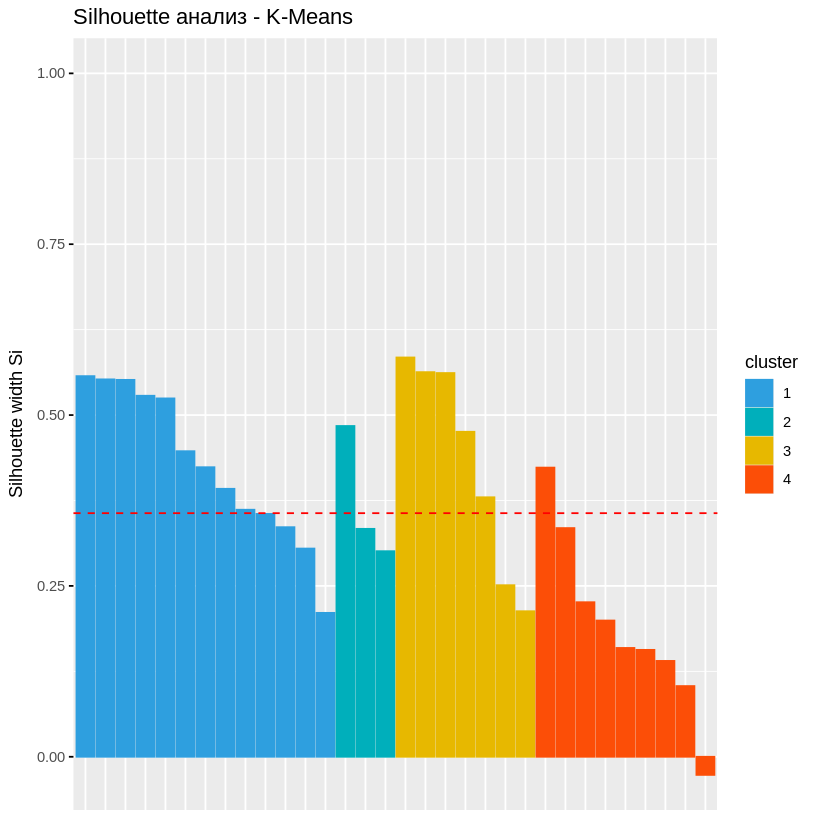

In [ ]:
# 7. ОЦЕНКА КАЧЕСТВА КЛАСТЕРИЗАЦИИ

# Silhouette анализ
silhouette_kmeans <- silhouette(kmeans_result$cluster, dist_matrix)
silhouette_hc <- silhouette(hc_clusters, dist_matrix)

cat("\n=== СРАВНЕНИЕ КАЧЕСТВА КЛАСТЕРИЗАЦИИ ===\n")
quality_comparison <- data.frame(
  Algorithm = c("K-Means", "Hierarchical", "DBSCAN"),
  Silhouette_Score = c(
    mean(silhouette_kmeans[, 3]),
    mean(silhouette_hc[, 3]),
    if(length(unique(dbscan_result$cluster)) > 1) {
      mean(silhouette(dbscan_result$cluster, dist_matrix)[, 3], na.rm = TRUE)
    } else NA
  ),
  Number_of_Clusters = c(
    length(unique(kmeans_result$cluster)),
    length(unique(hc_clusters)),
    length(unique(dbscan_result$cluster))
  )
)

print(quality_comparison)

# Визуализация Silhouette анализа
fviz_silhouette(silhouette_kmeans,
                palette = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07"),
                main = "Silhouette анализ - K-Means")



In [ ]:
# 8. ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ

# Детальный анализ кластеров K-Means
cat("\n=== ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ K-MEANS ===\n")
for(i in 1:4) {
  cluster_series <- series_data[series_data$kmeans_cluster == i, ]
  cat(paste0("\nКластер ", i, " (", nrow(cluster_series), " сериалов):\n"))
  cat("Сериалы:", paste(cluster_series$series_name, collapse = ", "), "\n")
  cat("Средний бюджет:", round(mean(cluster_series$budget_per_episode), 2), "млн $\n")
  cat("Средний рейтинг:", round(mean(cluster_series$imdb_rating), 2), "\n")
  cat("Среднее кол-во серий:", round(mean(cluster_series$total_episodes), 1), "\n")
  cat("Преобладающие жанры:", paste(names(sort(table(cluster_series$genre), decreasing = TRUE)[1:2]), collapse = ", "), "\n")
}




=== ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ K-MEANS ===

Кластер 1 (13 сериалов):
Сериалы: Breaking Bad, House of Cards, Chernobyl, The Office, Sherlock, Black Mirror, Narcos, Peaky Blinders, Dark, Rick and Morty, Better Call Saul, Fargo, True Detective 
Средний бюджет: 3.42 млн $
Средний рейтинг: 8.98 
Среднее кол-во серий: 50.5 
Преобладающие жанры: Crime, Drama 

Кластер 2 (3 сериалов):
Сериалы: The Simpsons, South Park, Family Guy 
Средний бюджет: 2.67 млн $
Средний рейтинг: 8.47 
Среднее кол-во серий: 491.7 
Преобладающие жанры: Animation, NA 

Кластер 3 (7 сериалов):
Сериалы: Game of Thrones, Stranger Things, The Crown, The Mandalorian, The Boys, Friends, Westworld 
Средний бюджет: 12.29 млн $
Средний рейтинг: 8.81 
Среднее кол-во серий: 66.7 
Преобладающие жанры: Sci-Fi, Comedy 

Кластер 4 (9 сериалов):
Сериалы: The Witcher, Ozark, Money Heist, The Queen's Gambit, The Big Bang Theory, How I Met Your Mother, The Handmaid's Tale, The Umbrella Academy, Mindhunter 
Средний бюджет: 5.72 млн $
Средн

In [ ]:
# 9. СОХРАНЕНИЕ РЕЗУЛЬТАТОВ

# Создание финальной таблицы с результатами
final_results <- series_data %>%
  select(series_name, total_episodes, budget_per_episode, imdb_rating, years_running, genre,
         kmeans_cluster, hc_cluster, dbscan_cluster)

cat("\n=== ПЕРВЫЕ 10 СТРОК РЕЗУЛЬТАТОВ ===\n")
print(head(final_results, 10))

# Сохранение результатов
write.csv(final_results, "series_clustering_analysis.csv", row.names = FALSE)
cat("\nРезультаты сохранены в файл 'series_clustering_analysis.csv'\n")




=== ПЕРВЫЕ 10 СТРОК РЕЗУЛЬТАТОВ ===
       series_name total_episodes budget_per_episode imdb_rating years_running
1  Game of Thrones             73               15.0         9.3             8
2  Stranger Things             34               12.0         8.7             6
3        The Crown             40               13.0         8.7             6
4     Breaking Bad             62                3.5         9.5             5
5  The Mandalorian             24               15.0         8.8             4
6      The Witcher             24               10.0         8.2             3
7   House of Cards             73                4.5         8.7             6
8         The Boys             24               11.0         8.7             4
9            Ozark             44                4.0         8.5             4
10     Money Heist             41                3.0         8.3             5
       genre kmeans_cluster hc_cluster dbscan_cluster
1    Fantasy              3          1  